In [63]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [64]:
import SimpleITK as sitk
folder_path = "/data/public/NANO_dual_energy/"\
              "20211205_cirs_phantom_kvs/120kV/"\
              "2021-12__Studies/PHANTOM^CIRS_ANON61440_CT_"\
              "2021-12-05_104549_SBRT.VERSA.CHEST(Adult)_SBRT."\
              "VERSA.CHEST.120kV.1.00.S3_n299__00000"
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(folder_path)
reader.SetFileNames(dicom_names)
image = reader.Execute()

In [65]:
image_arr = sitk.GetArrayFromImage(image)
image_arr = np.where(image_arr<-1000, -1000, image_arr)

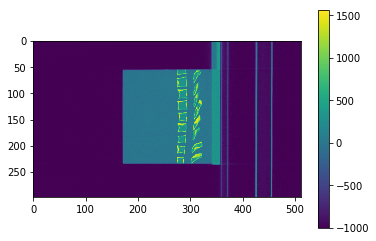

In [40]:
plt.imshow(image_arr[:, :, 256])
plt.colorbar()

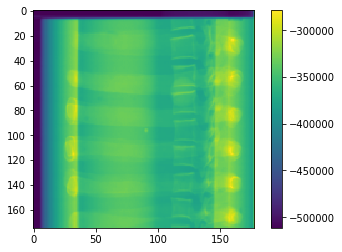

In [47]:
plt.imshow(np.sum(image_arr[50:225, 165:343, :], axis=2))
plt.colorbar()

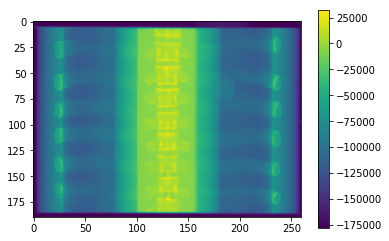

In [101]:
image_arr = image_arr[50:240, 165:343, 125:385]
plt.imshow(np.sum(image_arr, axis=1))
plt.colorbar()

In [129]:
from scipy.spatial.transform import Rotation as R
from scipy import ndimage, misc
# r = R.from_euler('zyx', [45, 0, 0], degrees=True)
angle = 30
rotated = ndimage.rotate(image_arr, 30, axes=(0, 1), mode='constant', cval=-1000)
rotated2 = ndimage.rotate(rotated, 30, axes=(1, 2), mode='constant', cval=-1000)

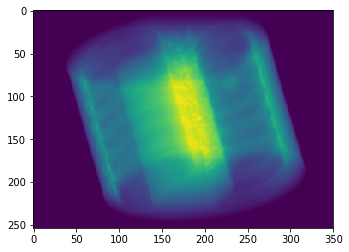

In [130]:
plt.imshow(np.sum(rotated2, axis=1))

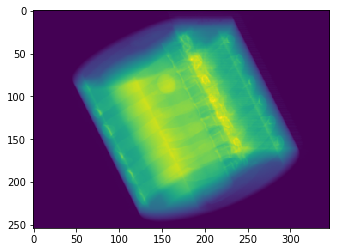

In [131]:
plt.imshow(np.sum(rotated2, axis=2))

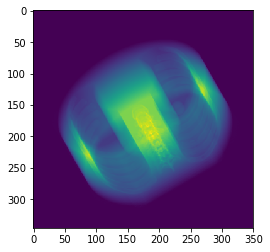

In [122]:
plt.imshow(np.sum(rotated2, axis=0))

In [173]:
!mkdir /data/public/NANO_dual_energy/20211205_cirs_phantom_kvs/80kV/2021-12__Studies/drr/compound_rotations

In [175]:
folder_path = "/data/public/NANO_dual_energy/20211205_cirs_phantom_kvs/80kV/2021-12__Studies/PHANTOM^CIRS_ANON61440_CT_2021-12-05_104549_SBRT.VERSA.CHEST(Adult)_SBRT.VERSA.CHEST.80kV.1.00.S3_n299__00000/"
reader = sitk.ImageSeriesReader()
dicom_names = reader.GetGDCMSeriesFileNames(folder_path)
reader.SetFileNames(dicom_names)
image = reader.Execute()
image_arr = sitk.GetArrayFromImage(image)
image_arr = np.where(image_arr<-1000, -1000, image_arr)
image_arr = image_arr[50:240, 165:343, 125:385]

target_folder = "/data/public/NANO_dual_energy/20211205_cirs_phantom_kvs/80kV/2021-12__Studies/drr/compound_rotations"
i = 0
for angle_x in [-30, -15, 0, 15, 30]:
    for angle_y in [-30, -15, 0, 15, 30]:
        for angle_z in range(0, 180, 5):
            name_str = f'{angle_x}_{angle_y}_{angle_z}.npy'
            name_str = name_str.replace('-', 'm')
            if not i%10:
                print(f'{100*i/(25*36):0.2f}%', name_str)
            rot_x = ndimage.rotate(image_arr, angle_x, axes=(0, 1), mode='constant', cval=-1000)
            rot_y = ndimage.rotate(rot_x, angle_y, axes=(0, 2), mode='constant', cval=-1000)
            rot_z = ndimage.rotate(rot_y, angle_z, axes=(1, 2), mode='constant', cval=-1000)
            proj = np.sum(rot_z, axis=1)
            i +=1
            with open(os.path.join(target_folder, name_str), 'wb') as f:
                np.save(f, proj)

0.00% m30_m30_0.npy
1.11% m30_m30_50.npy
2.22% m30_m30_100.npy
3.33% m30_m30_150.npy
4.44% m30_m15_20.npy
5.56% m30_m15_70.npy
6.67% m30_m15_120.npy
7.78% m30_m15_170.npy
8.89% m30_0_40.npy
10.00% m30_0_90.npy
11.11% m30_0_140.npy
12.22% m30_15_10.npy
13.33% m30_15_60.npy
14.44% m30_15_110.npy
15.56% m30_15_160.npy
16.67% m30_30_30.npy
17.78% m30_30_80.npy
18.89% m30_30_130.npy
20.00% m15_m30_0.npy
21.11% m15_m30_50.npy
22.22% m15_m30_100.npy
23.33% m15_m30_150.npy
24.44% m15_m15_20.npy
25.56% m15_m15_70.npy
26.67% m15_m15_120.npy
27.78% m15_m15_170.npy
28.89% m15_0_40.npy
30.00% m15_0_90.npy
31.11% m15_0_140.npy
32.22% m15_15_10.npy
33.33% m15_15_60.npy
34.44% m15_15_110.npy
35.56% m15_15_160.npy
36.67% m15_30_30.npy
37.78% m15_30_80.npy
38.89% m15_30_130.npy
40.00% 0_m30_0.npy
41.11% 0_m30_50.npy
42.22% 0_m30_100.npy
43.33% 0_m30_150.npy
44.44% 0_m15_20.npy
45.56% 0_m15_70.npy
46.67% 0_m15_120.npy
47.78% 0_m15_170.npy
48.89% 0_0_40.npy
50.00% 0_0_90.npy
51.11% 0_0_140.npy
52.22% 0_15

In [177]:
import os
os.getcwd()

'/home/manwatkarc/DualEnergy_Synthetic_Energy/src/preprocessing'